<a href="https://colab.research.google.com/github/Akash007y/MachineLearningProjects/blob/main/cat_v_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [5]:
!kaggle datasets download -d salader/dogs-vs-cats



100% 1.06G/1.06G [00:49<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [17]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [10]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 1.1281 - accuracy: 0.6125 - val_loss: 0.6363 - val_accuracy: 0.6620
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5472 - accuracy: 0.7326 - val_loss: 0.5194 - val_accuracy: 0.7362
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4543 - accuracy: 0.7911 - val_loss: 0.5418 - val_accuracy: 0.7302
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3775 - accuracy: 0.8303 - val_loss: 0.4417 - val_accuracy: 0.8022
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3087 - accuracy: 0.8674 - val_loss: 0.5918 - val_accuracy: 0.7372
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2608 - accuracy: 0.8920 - val_loss: 0.4693 - val_accuracy: 0.8034
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1609 - accuracy: 0.9357 - val_loss: 0.6406 - val_ac

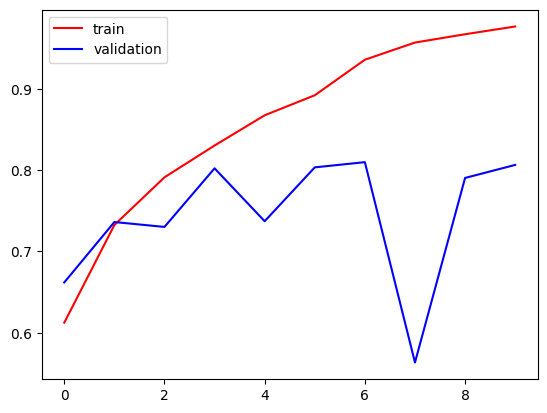

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



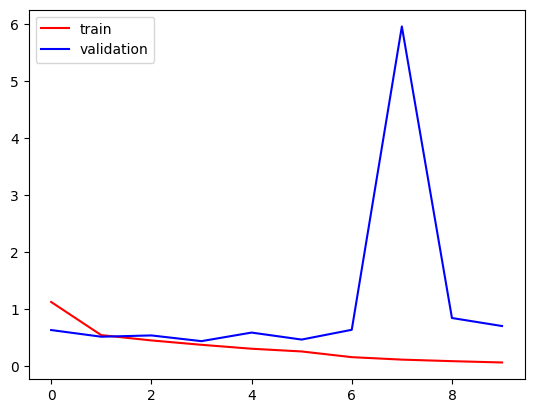

In [16]:


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Batch Norm
# Reduce complexity


In [18]:
import cv2

In [20]:
test_img = cv2.imread('/content/dog image.jpeg')

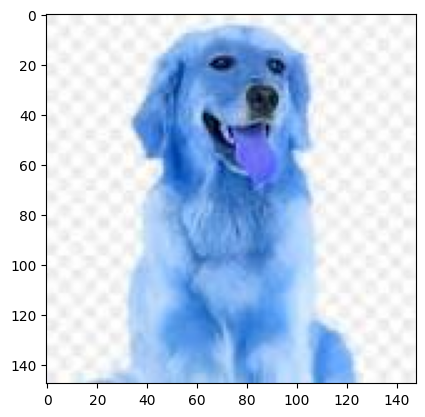

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(148, 148, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 1s 545ms/step


array([[0.08023425]], dtype=float32)

In [26]:
test_img = cv2.imread('/content/cat image.jpeg')

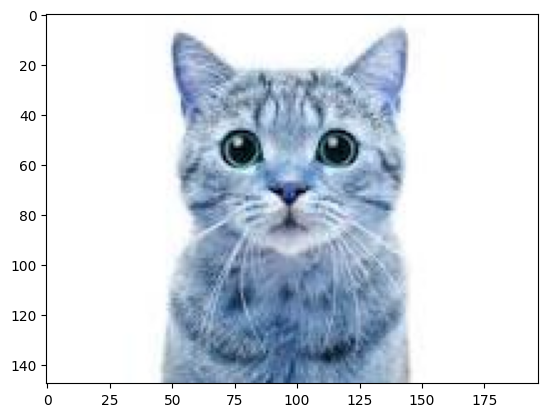

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(148, 197, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.34834707]], dtype=float32)